In [1]:
import pytorch_lightning as pl
from pl_bolts.models.vision import ImageGPT
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
import torch
import matplotlib.pyplot as plt

C:\Users\steph\anaconda3\envs\my_torch\lib\site-packages\pl_bolts\callbacks\data_monitor.py:20: UnderReviewWarning: The feature warn_missing_pkg is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  warn_missing_pkg("wandb")
C:\Users\steph\anaconda3\envs\my_torch\lib\site-packages\pl_bolts\utils\semi_supervised.py:15: UnderReviewWarning: The feature warn_missing_pkg is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  warn_missing_pkg("sklearn", pypi_name="scikit-learn")
C:\Users\steph\anaconda3\envs\my_torch\lib\site-packages\pl_b

In [2]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(training_data, batch_size=16, num_workers=os.cpu_count()//2)
test_loader = DataLoader(test_data, batch_size=16, num_workers=os.cpu_count()//2)

In [20]:
trainer = pl.Trainer(max_epochs=5)
model = ImageGPT()
trainer.fit(model, train_dataloaders=train_loader)
torch.save(model.state_dict(), "./saved_models/bolt_imagegpt.pth")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\steph\AppData\Local\Temp\ipykernel_12972\3980007736.py:2: UnderReviewWarning: The feature ImageGPT is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  model = ImageGPT()
C:\Users\steph\anaconda3\envs\my_torch\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name      | Type             | Params
-----------------------------------------------
0 | gpt       | GPT2             | 19.8 K
1 | criterion | CrossEntropyLoss | 0     
-------------------------------

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [21]:
model = ImageGPT()
model.load_state_dict(torch.load("./saved_models/bolt_imagegpt.pth"))

C:\Users\steph\AppData\Local\Temp\ipykernel_12972\3779277387.py:1: UnderReviewWarning: The feature ImageGPT is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  model = ImageGPT()


<All keys matched successfully>

In [27]:
first_batch = next(iter(test_loader))
print(first_batch[0].size())
print(first_batch[0][0][0,].size())
with torch.no_grad():
    pred = model(first_batch[0])

torch.Size([16, 1, 28, 28])
torch.Size([28, 28])


In [23]:
first_batch[0][:,:,0:14,:].size()
with torch.no_grad():
    pred = model(first_batch[0][:,:,0:14,:])

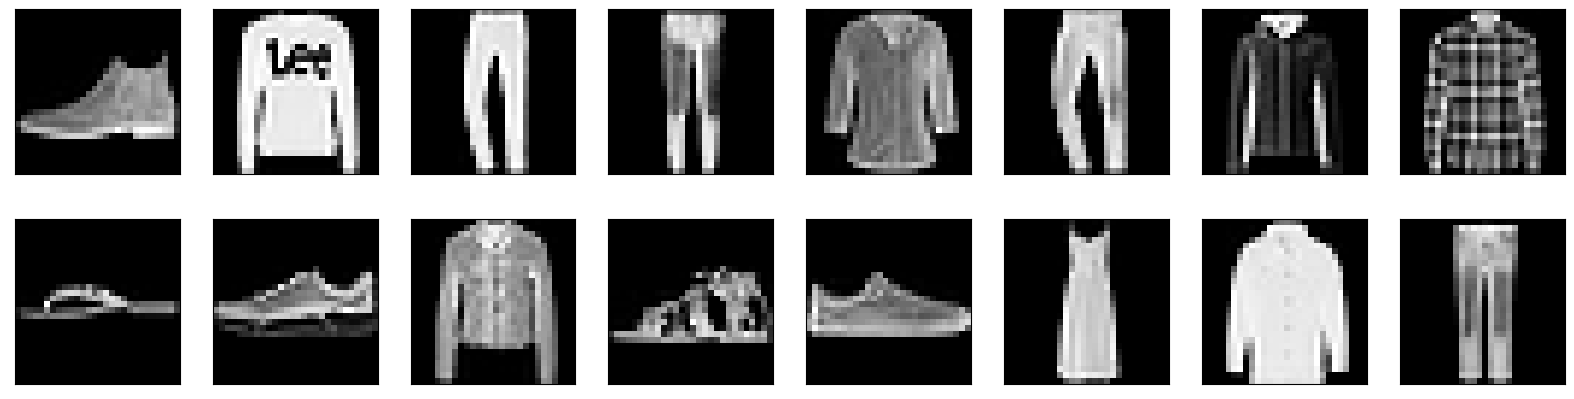

In [24]:
fig = plt.figure(figsize=(20,5))
for j in range(16):
    ax = fig.add_subplot(2,8, j+1, xticks=[], yticks=[])
    ax.imshow(first_batch[0][j][0,].numpy(), cmap='gray')

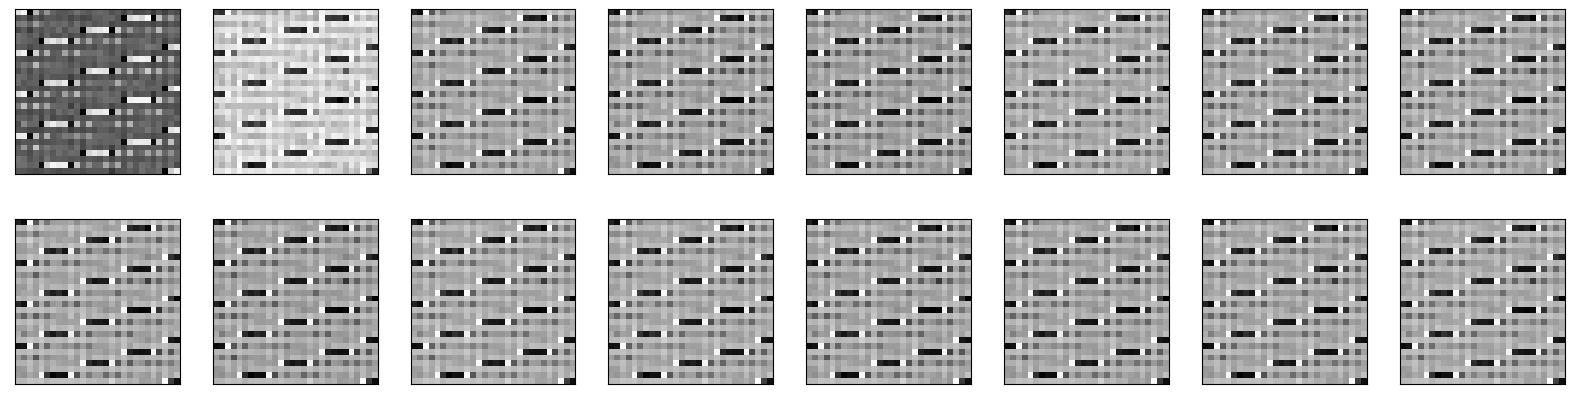

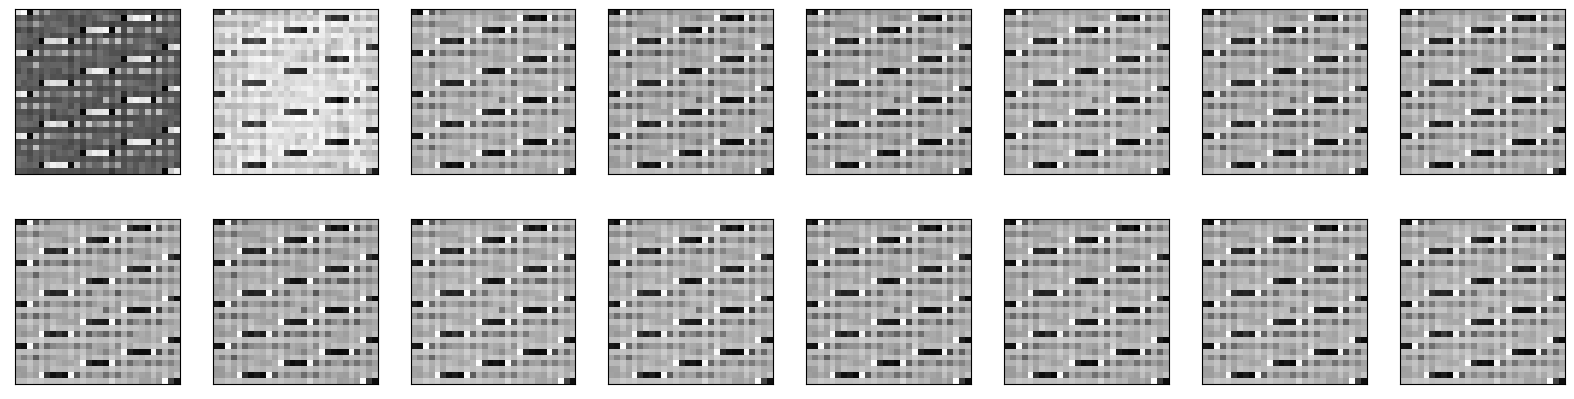

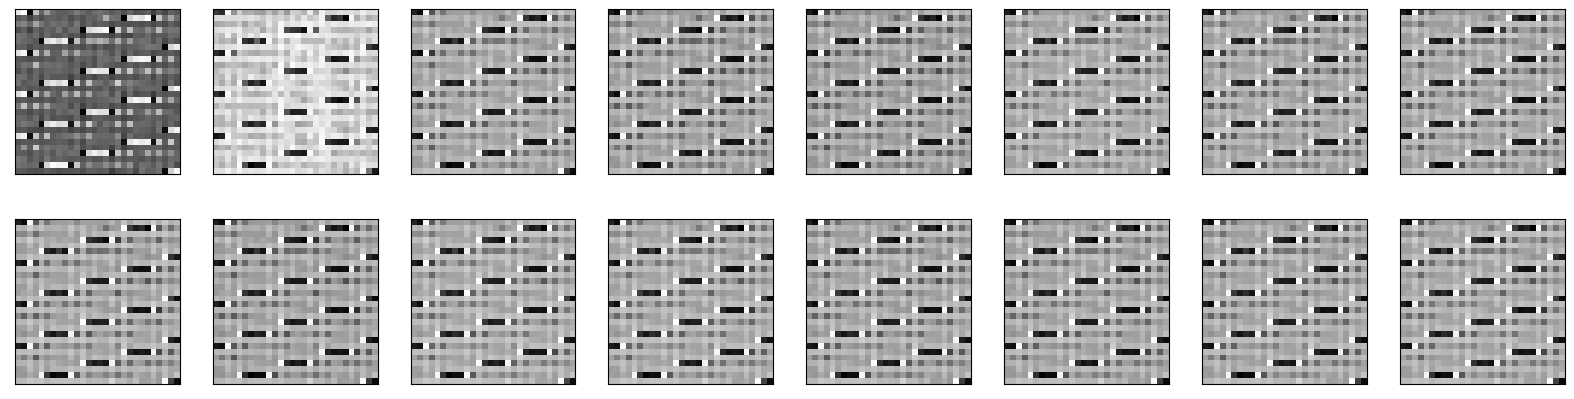

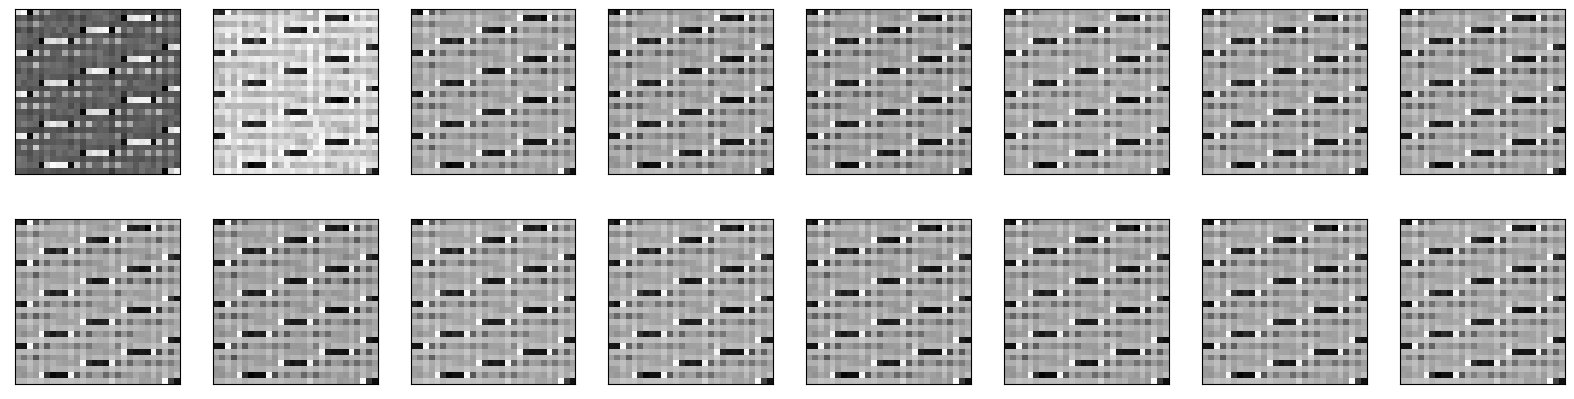

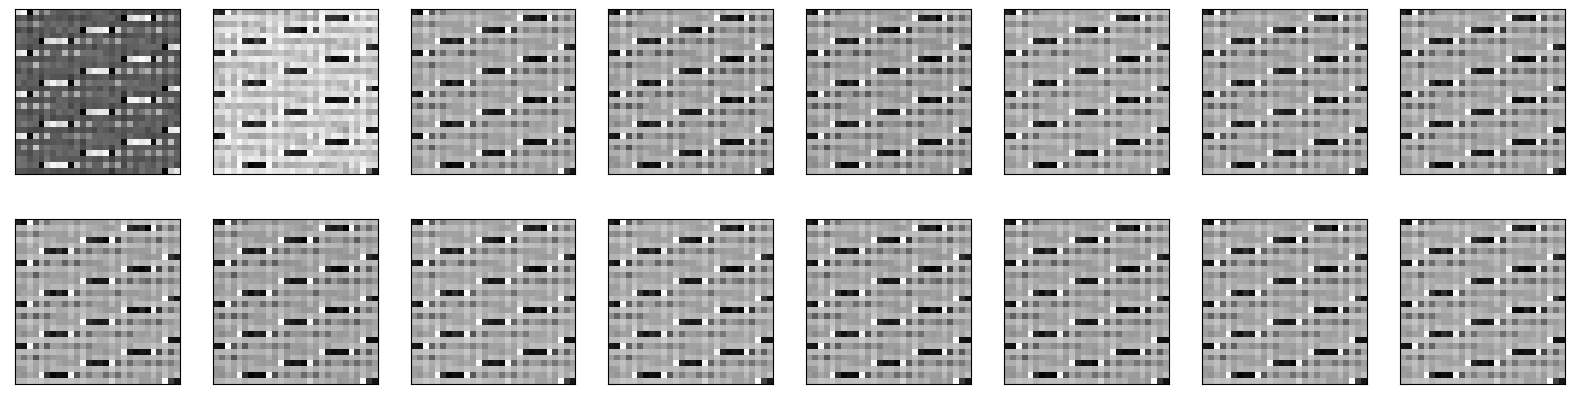

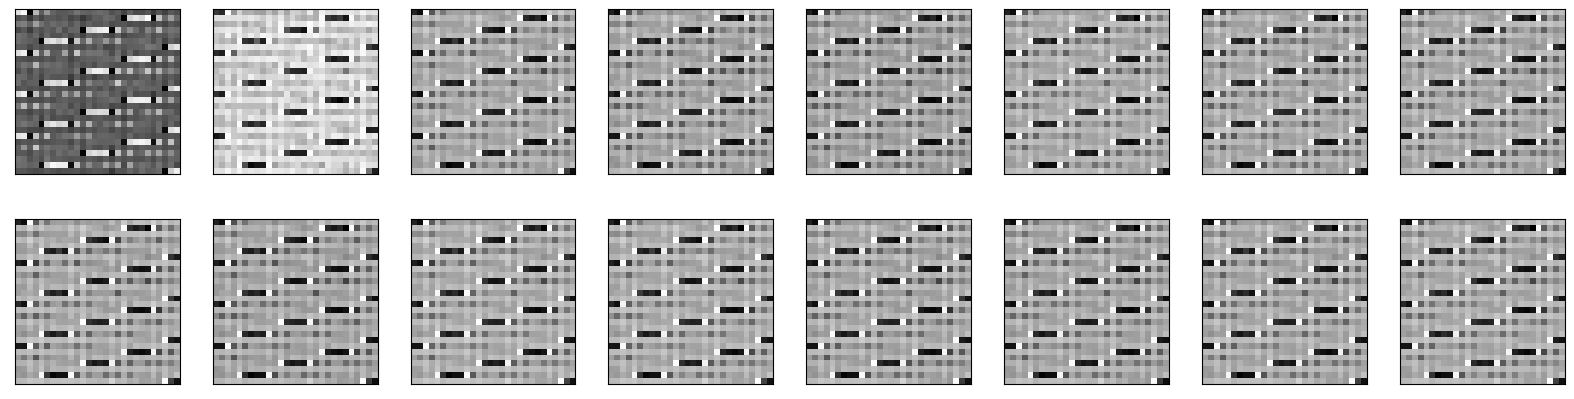

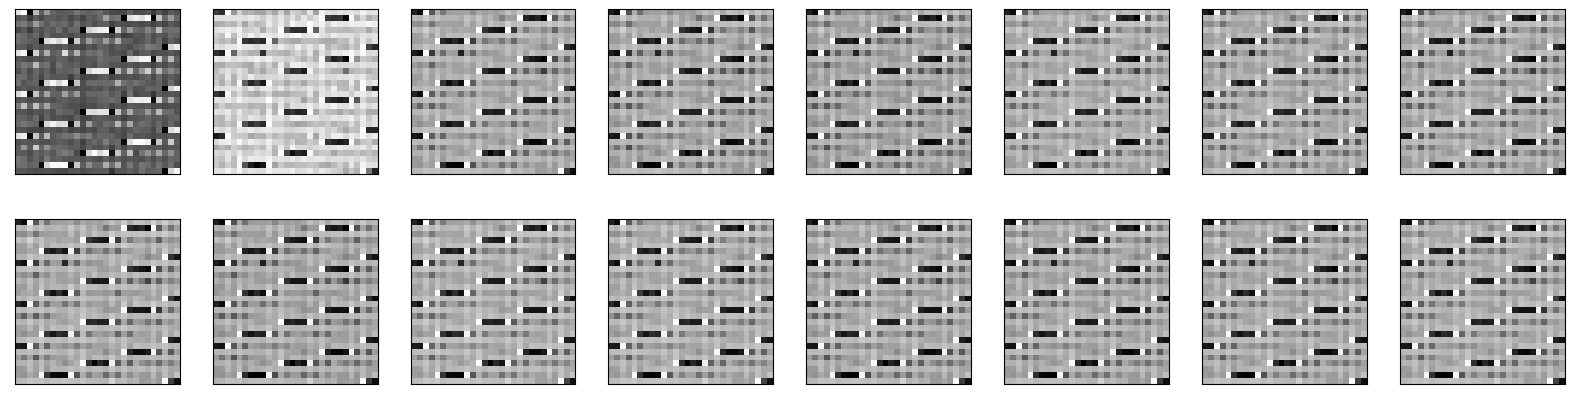

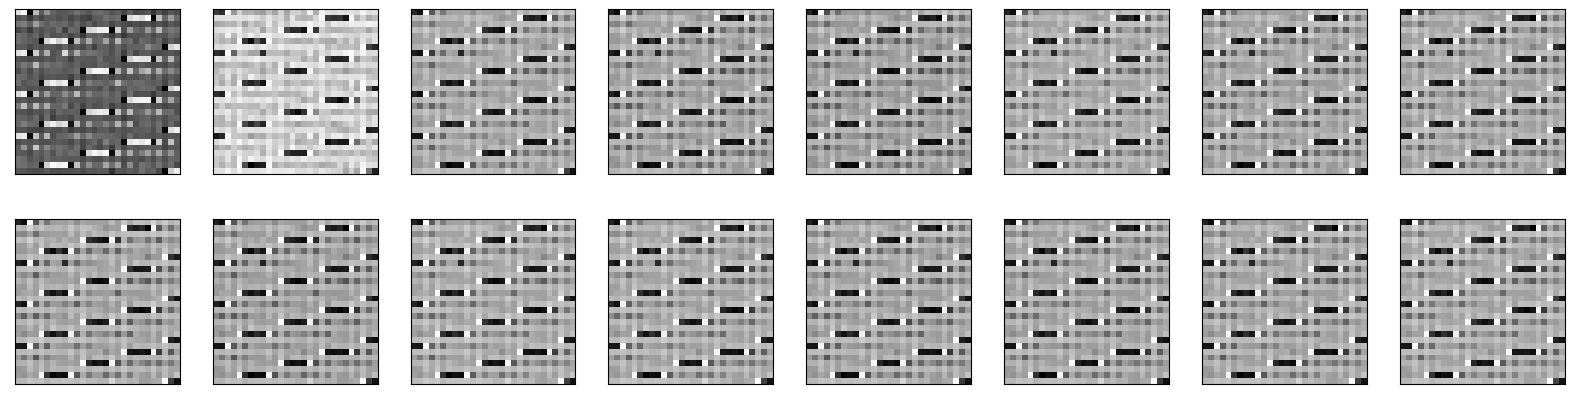

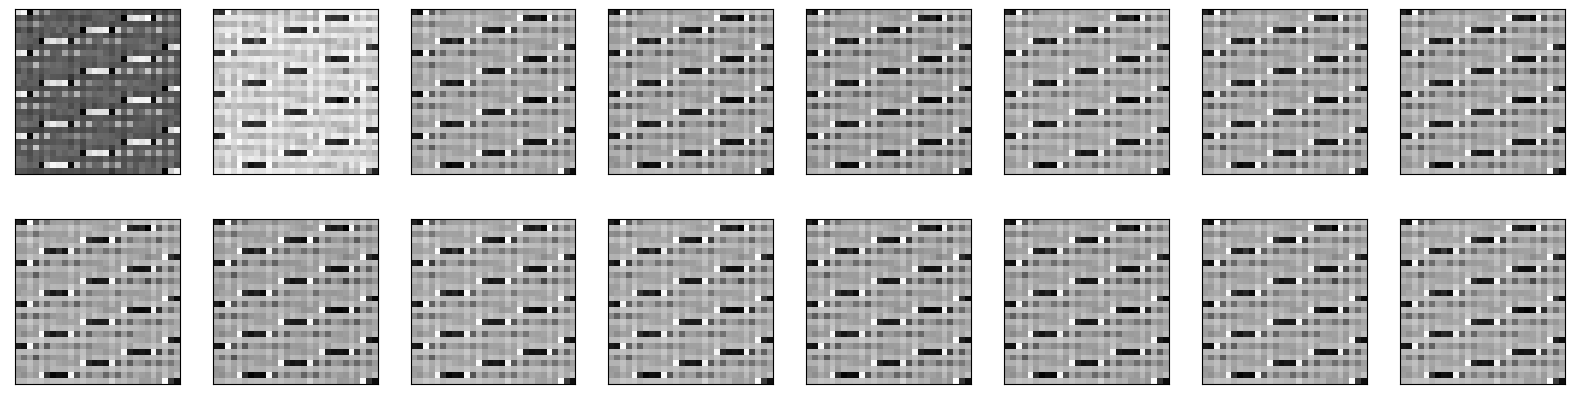

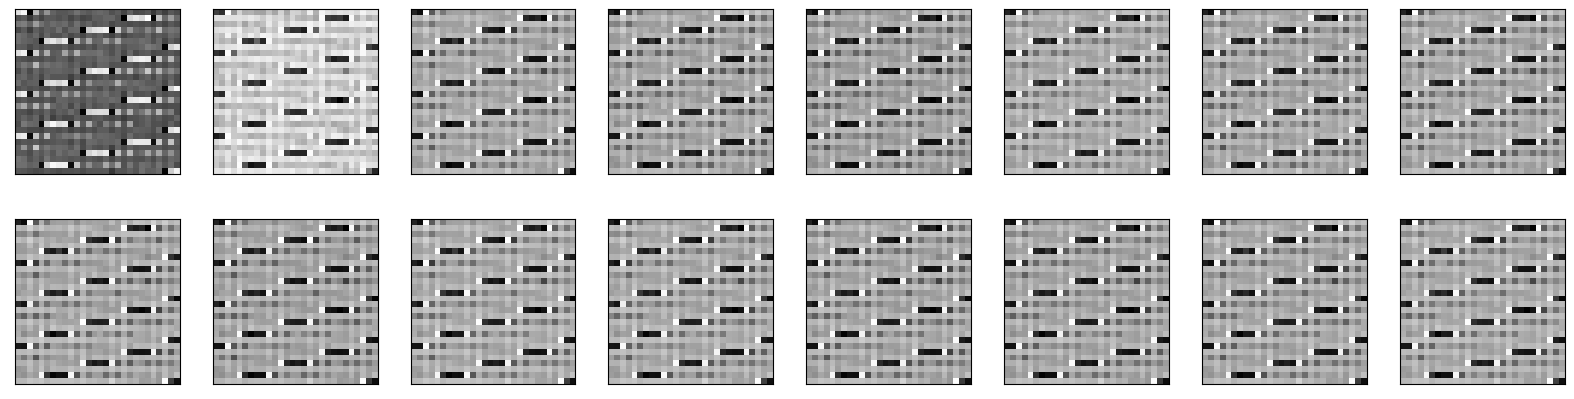

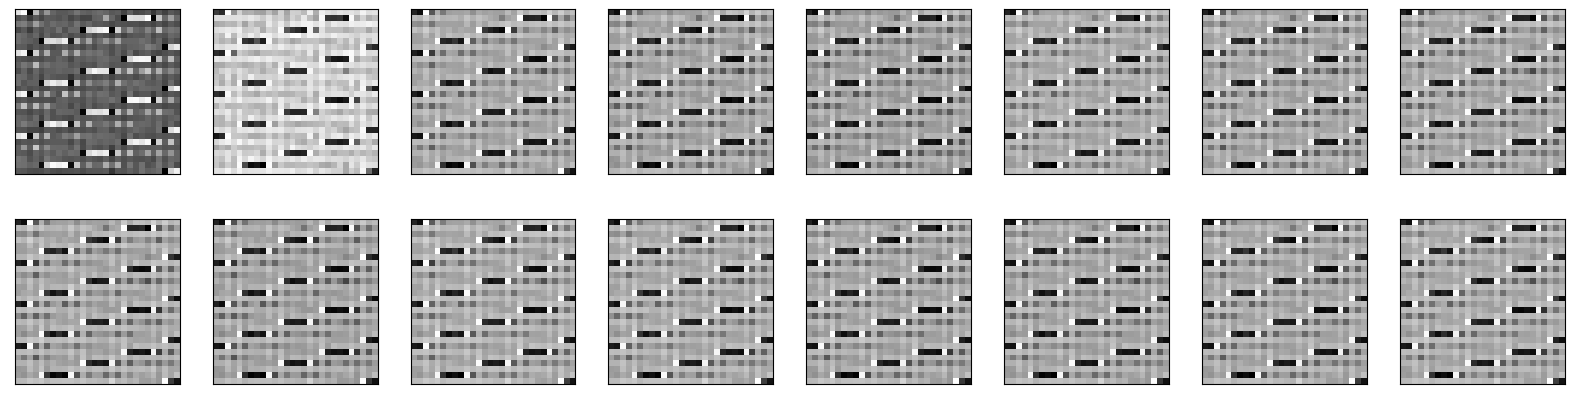

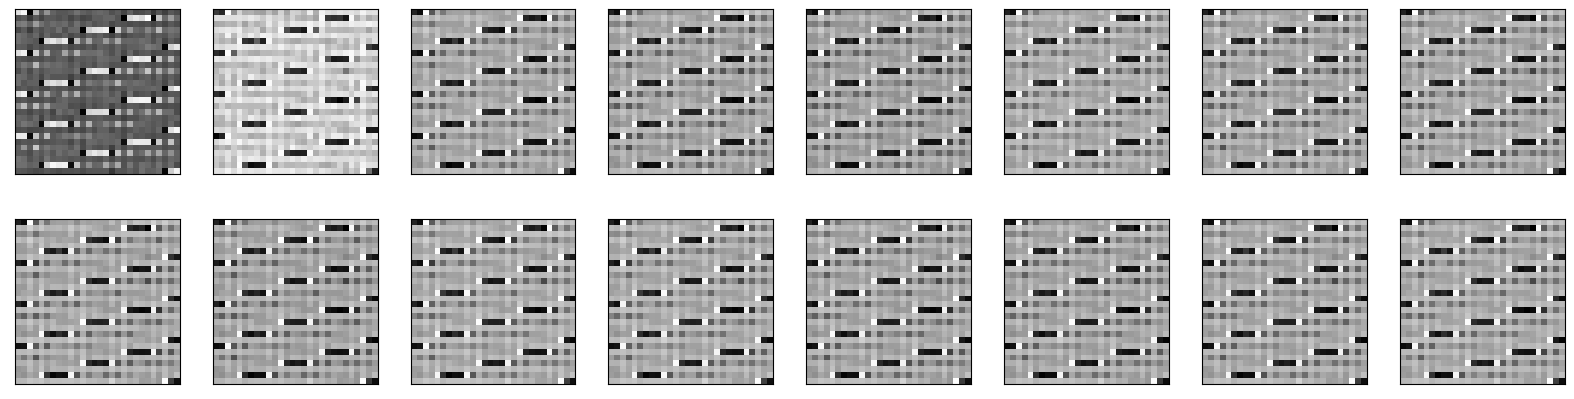

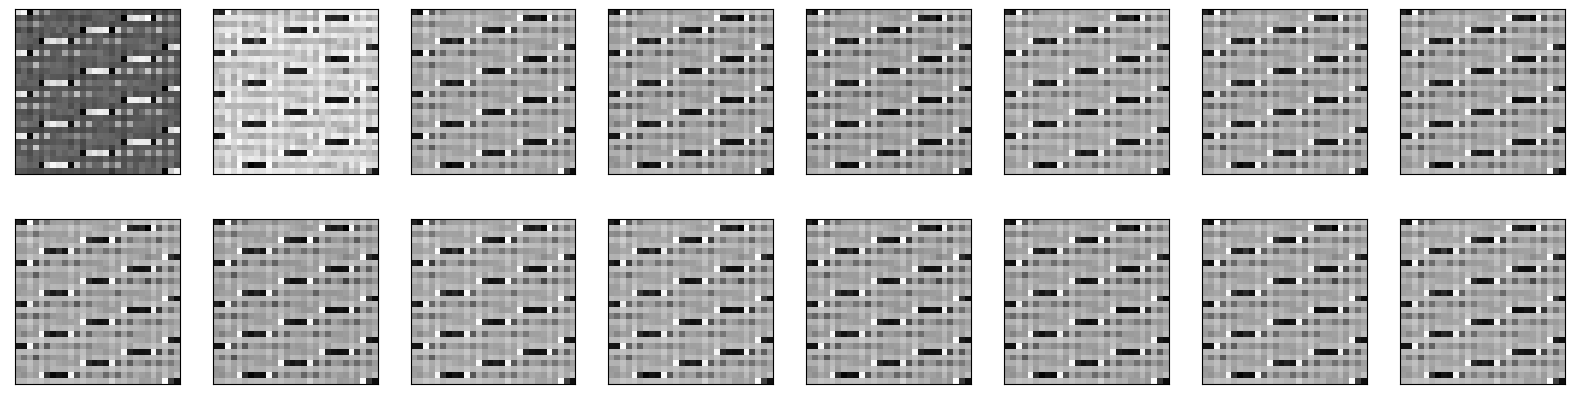

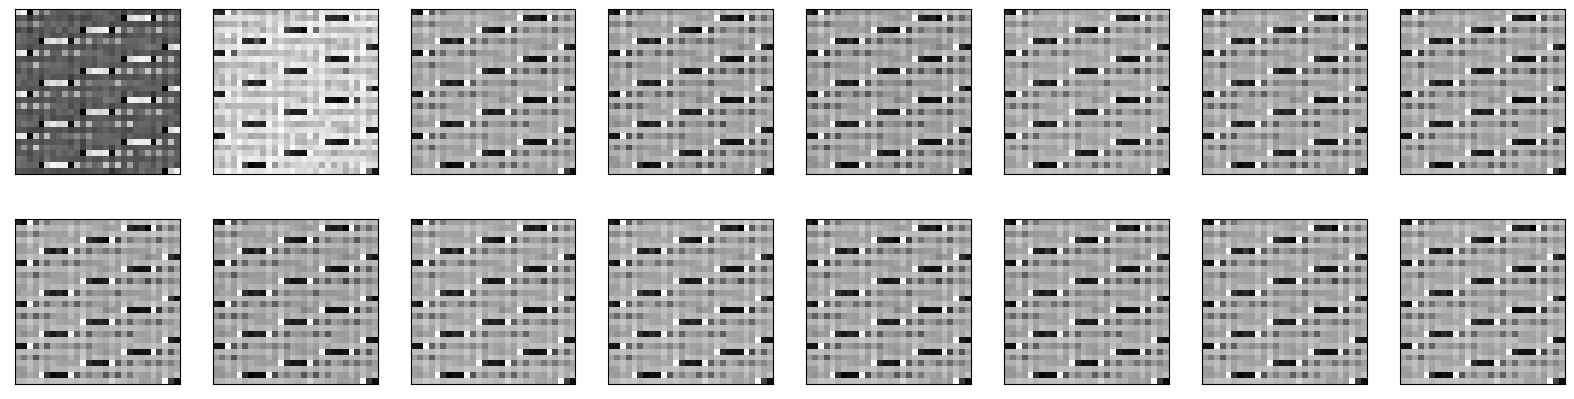

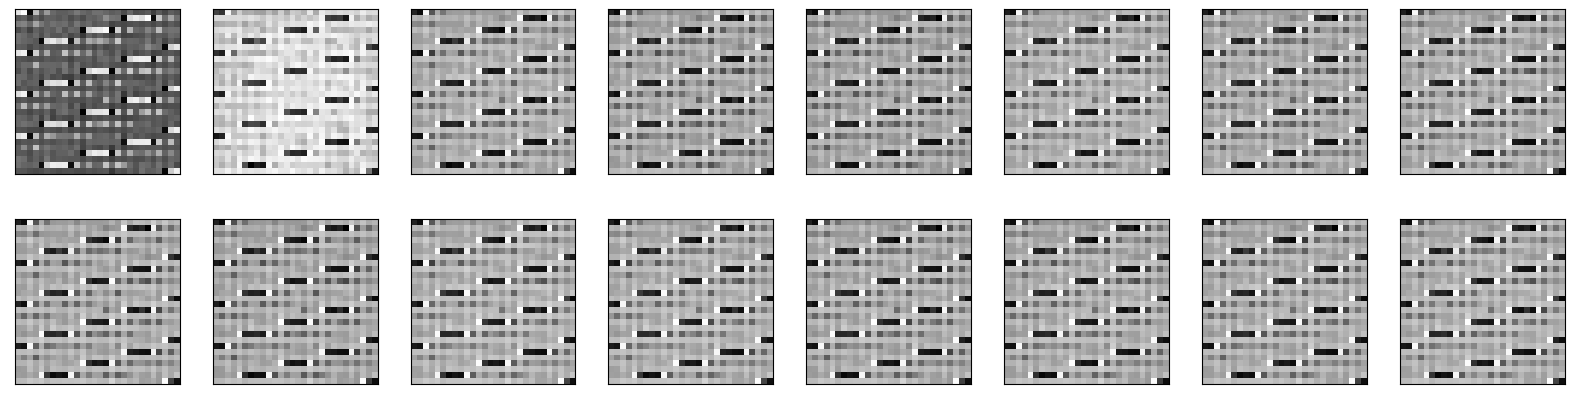

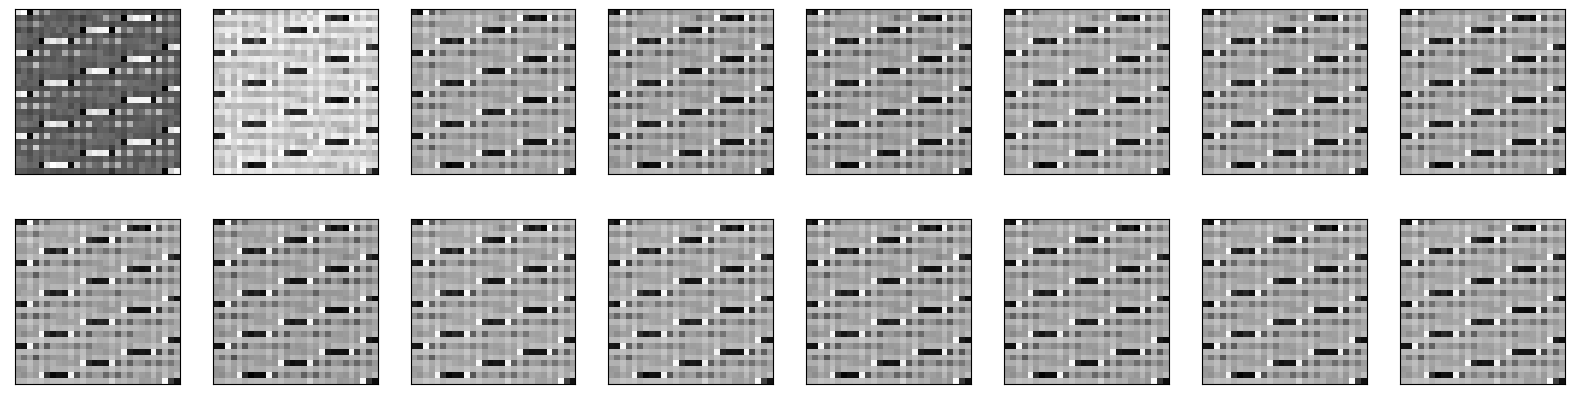

In [29]:
with torch.no_grad():
    for i in range(16):
        fig = plt.figure(figsize=(20,5))
        for j in range(16):
            ax = fig.add_subplot(2,8, j+1, xticks=[], yticks=[])
            first = pred[:,i][:,j]
            unflattened = torch.unflatten(first,0, (28,28))
            ax.imshow(unflattened.numpy(), cmap='gray')